In [23]:
import pymongo
import pandas as pd
import numpy as np
from datetime import date
from dateutil import parser as date_parser
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 9]

In [24]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.trading
collection = db.GOOGL

In [25]:
df = pd.DataFrame(list(collection.find()))

In [26]:
df

,_id,date,open,high,low,close,volume,symbol
0,5f5b3d980769b13fd6ebb649,2020-09-10T00:00:00.000Z,1550.18,1573.66,1520.0000,1526.050,1651194.0,GOOGL
1,5f5b3d980769b13fd6ebb64a,2020-09-09T00:00:00.000Z,1548.90,1558.72,1525.1700,1547.230,1962078.0,GOOGL
2,5f5b3d980769b13fd6ebb64b,2020-09-08T00:00:00.000Z,1525.00,1555.55,1516.5000,1523.600,2701586.0,GOOGL
3,5f5b3d980769b13fd6ebb64c,2020-09-04T00:00:00.000Z,1609.00,1634.99,1537.9701,1581.210,2792533.0,GOOGL
4,5f5b3d980769b13fd6ebb64d,2020-09-03T00:00:00.000Z,1699.52,1700.00,1607.7100,1629.510,3186287.0,GOOGL
...,...,...,...,...,...,...,...,...
4039,5f5b3d980769b13fd6ebc610,2004-08-25T00:00:00.000Z,104.76,108.00,103.8800,106.000,9188600.0,GOOGL
4040,5f5b3d980769b13fd6ebc611,2004-08-24T00:00:00.000Z,111.24,111.60,103.5700,104.870,15247300.0,GOOGL
4041,5f5b3d980769b13fd6ebc612,2004-08-23T00:00:00.000Z,110.76,113.48,109.0500,109.400,18256100.0,GOOGL
4042,5f5b3d980769b13fd6ebc613,2004-08-20T00:00:00.000Z,101.01,109.08,100.5000,108.310,22834300.0,GOOGL


In [27]:
df2 = df[['date', 'symbol', 'open', 'close', 'high', 'low', 'volume']]

In [28]:
df2['date'] = pd.to_datetime(df2['date']).dt.tz_localize(None)

<ipython-input-28-6ebc0551d850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date']).dt.tz_localize(None)


In [29]:
df2

,date,symbol,open,close,high,low,volume
0,2020-09-10,GOOGL,1550.18,1526.050,1573.66,1520.0000,1651194.0
1,2020-09-09,GOOGL,1548.90,1547.230,1558.72,1525.1700,1962078.0
2,2020-09-08,GOOGL,1525.00,1523.600,1555.55,1516.5000,2701586.0
3,2020-09-04,GOOGL,1609.00,1581.210,1634.99,1537.9701,2792533.0
4,2020-09-03,GOOGL,1699.52,1629.510,1700.00,1607.7100,3186287.0
...,...,...,...,...,...,...,...
4039,2004-08-25,GOOGL,104.76,106.000,108.00,103.8800,9188600.0
4040,2004-08-24,GOOGL,111.24,104.870,111.60,103.5700,15247300.0
4041,2004-08-23,GOOGL,110.76,109.400,113.48,109.0500,18256100.0
4042,2004-08-20,GOOGL,101.01,108.310,109.08,100.5000,22834300.0


In [30]:
#df2 = df2.set_index('date')

In [31]:
df3 = df2[['date', 'open']]

In [32]:
df3 = df3.resample('1440Min', on='date').first().drop('date', 1).reset_index()

In [11]:
#df3 = df3.dropna()

In [33]:
df3 = df3.fillna(method='ffill')

In [34]:
df3

,date,open
0,2004-08-19,100.01
1,2004-08-20,101.01
2,2004-08-21,101.01
3,2004-08-22,101.01
4,2004-08-23,110.76
...,...,...
5862,2020-09-06,1609.00
5863,2020-09-07,1609.00
5864,2020-09-08,1525.00
5865,2020-09-09,1548.90


In [35]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [36]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima 

In [37]:
df4 = df3.set_index('date')

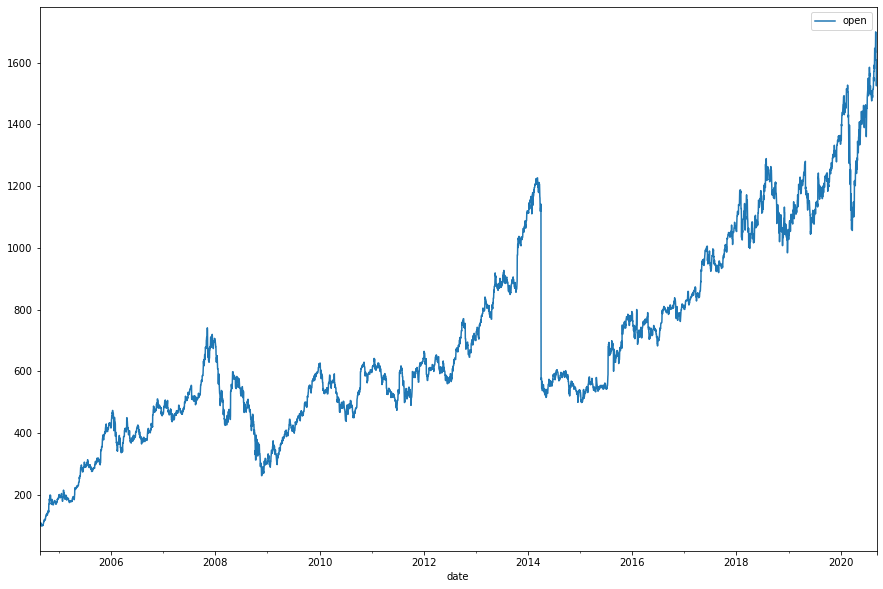

In [38]:
df4.plot(figsize=(15,10))

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df4[['open']][:3911].values)
X_val = scaler.transform(df4[['open']][1955:3911].values)
X_test = scaler.transform(df4[['open']][3911:].values)

In [51]:
df4[['open']][3911:].values

array([[ 550.16],
       [ 542.64],
       [ 535.9 ],
       ...,
       [1525.  ],
       [1548.9 ],
       [1550.18]])

In [52]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [53]:
X_train, y_train = split_sequence(X_train, 12)
X_val, y_val = split_sequence(X_val, 12)
X_test, y_test = split_sequence(X_test, 12)

In [54]:
X_test

array([[[0.39998759],
        [0.3933192 ],
        [0.38734249],
        ...,
        [0.39449859],
        [0.40019154],
        [0.40019154]],

       [[0.3933192 ],
        [0.38734249],
        [0.39884367],
        ...,
        [0.40019154],
        [0.40019154],
        [0.40019154]],

       [[0.38734249],
        [0.39884367],
        [0.39884367],
        ...,
        [0.40019154],
        [0.40019154],
        [0.39436557]],

       ...,

       [[1.37226769],
        [1.35706875],
        [1.35706875],
        ...,
        [1.33891692],
        [1.33891692],
        [1.33891692]],

       [[1.35706875],
        [1.35706875],
        [1.35706875],
        ...,
        [1.33891692],
        [1.33891692],
        [1.26442968]],

       [[1.35706875],
        [1.35706875],
        [1.36957196],
        ...,
        [1.33891692],
        [1.26442968],
        [1.28562308]]])

In [55]:
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [56]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [77]:
model = Sequential([
    LSTM(50, activation="relu", input_shape=X_train.shape[1:]), # or (X_train.shape[1], 1) or (n_steps, n_features)
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [78]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10,
                          restore_best_weights=True) 

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val),
                    batch_size = 32,
                    callbacks=early_stopping_cb)

Epoch 1/100
 93/122 [=====================>........] - ETA: 0s - loss: 0.0208

In [61]:
mse_test = model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 3ms/step - loss: 2.0282e-04


In [62]:
rmse = np.sqrt(mse_test)
print(rmse)

0.01424141957598361


In [63]:
mse_test = model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 3ms/step - loss: 2.0282e-04


In [65]:
predicted_open = model.predict(X_test)
predicted_open = scaler.inverse_transform(predicted_open)

In [66]:
prediction = pd.Series(predicted_open[-720:].reshape(-1), index = df4['open'].iloc[-720:].index)

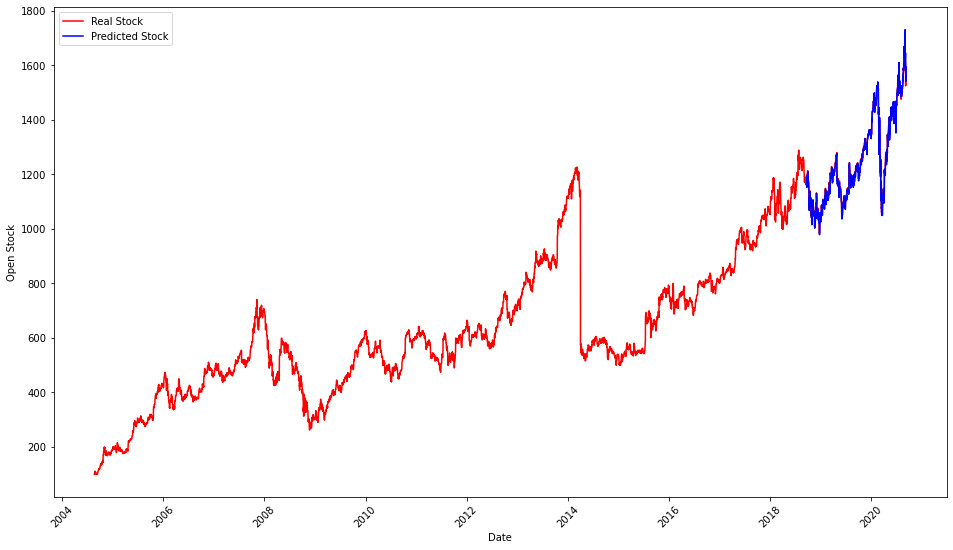

In [67]:
plt.plot(df4['open'], color = 'r', label = 'Real Stock')
plt.plot(prediction, color = 'b', label = 'Predicted Stock')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Open Stock')
plt.legend()
plt.show()

In [75]:
X_test[0]

array([[0.39998759],
       [0.3933192 ],
       [0.38734249],
       [0.39884367],
       [0.39884367],
       [0.39884367],
       [0.39850671],
       [0.39346995],
       [0.39139495],
       [0.39449859],
       [0.40019154],
       [0.40019154]])

In [74]:
predicted_open = model.predict(X_test)

In [ ]:
predicted_open = scaler.inverse_transform(predicted_open)

In [ ]:
prediction = pd.Series(predicted_open[-720:].reshape(-1), index = df4['open'].iloc[-720:].index)

In [70]:
df4['open'].iloc[-720:]

date
2018-09-22    1194.92
2018-09-23    1194.92
2018-09-24    1159.41
2018-09-25    1184.25
2018-09-26    1193.69
               ...   
2020-09-06    1609.00
2020-09-07    1609.00
2020-09-08    1525.00
2020-09-09    1548.90
2020-09-10    1550.18
Name: open, Length: 720, dtype: float64

In [ ]:
from pygooglenews import GoogleNews
import pprint
gn = GoogleNews()
top = gn.top_news()
# gn = GoogleNews(lang = 'cn', country = 'CN')
# top = gn.top_news()
# business = gn.topic_headlines('BUSINESS')
search = gn.search('MSFT', when = '1d')
entries = search['entries']   

In [ ]:
data = pd.DataFrame(columns = ['Author', 'Date', 'Title', 'Link'])

In [ ]:
for entrie in entries :
    data = data.append(pd.Series({'Author': entrie.source.title, \
                           'Date': date_parser.parse(entrie.published),\
                           'Title': entrie.title, \
                           'Link': entrie.link \
                          }), \
                ignore_index=True)

In [ ]:
data

In [ ]:
# series = TimeSeries.from_dataframe(df3, 'date', 'open','D')
# series.plot()

In [ ]:
# from darts.models import ExponentialSmoothing
# train, val = series.split_before(pd.Timestamp('20180101'))

In [ ]:
# model = ExponentialSmoothing()
# model.fit(train)

# prediction = model.predict(len(val))

In [ ]:
# series.plot(label='actual')
# prediction.plot(label='forecast', lw=1)
# plt.legend()

In [ ]:
# from darts.models import AutoARIMA
# model_aarima = AutoARIMA()

In [ ]:
# model_aarima.fit(train)
# prediction_aarima = model_aarima.predict(len(val))

In [ ]:
# prediction_aarima

In [ ]:
# from darts.backtesting import backtest_forecasting
# from darts.models import Prophet

In [ ]:
# models = [ExponentialSmoothing(), Prophet()]

In [ ]:
# backtests = [backtest_forecasting(series, model,pd.Timestamp('2020-01-01'), fcast_horizon_n=3) for model in models]

In [ ]:
# from darts.metrics import mape
# series.plot(label='data')
# for i, m in enumerate(models):
#     err = mape(backtests[i], series)
#     backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))
# plt.title('Backtests with 3-months forecast horizon')
# plt.legend()